In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
fig_size = (4,4)
fsz = 10 # font size
plt.rcParams.update({'font.size': fsz})

In [2]:
def cheb(N):
    if N == 0:
        D = 0
        x = 1
        return D,x
    x = np.cos(np.pi*np.arange(N+1)/N)
    c = np.ones((N+1,))
    c[0] = 2
    c[N] = 2
    c[1::2] = -c[1::2]
    # create an (N+1)-by-(N+1) matrix whose columns are the vectors of Chebychev nodes
    X = np.zeros((N+1,N+1))
    for j in range(N+1):
        X[:,j] = x
    dX = X - np.transpose(X)
    D = np.outer(c,1/c)/(dX + np.eye(N+1)) # off-diagonal entries
    D = D - np.diag(np.sum(D,axis = 1)) # D[i,i] = -\sum_{j\neq i} D[i,j] 
    return D,x
def ChebSum2_Clenshaw_matrix(n,x,c):
    diagonals = [np.ones((n+1,)),-2*x*np.ones((n,)),np.ones((n-1,))]
    A = scipy.sparse.diags(diagonals,[0,-1,-2],shape=(n+1,n+1))
    A = A.toarray()
    b = scipy.linalg.solve_triangular(np.transpose(A),c,lower = False) # Upper-triangular solver
    return 0.5*(b[0] - b[2] - b[n]*np.cos(n*np.arccos(x)))
    

In [3]:
##Problem 5
def solvePDE1(N,scale,shift,f,x_evaluate,qbdry):
    D, x = cheb(N)
    D2 = D @ D
    D4 = D2 @ D2
    A = D4 - 4 * D2 + 3 * np.eye(N+1)
    RHS = f(x)
    
    # Enforce u(1)=0
    A[0, :] = 0
    A[0, 0] = 1
    RHS[0] = 0 

    #Enforce Du(1)=0
    A[1, :] = D[0, :]
    RHS[1] = 0

    #Enforce Du(-1)=0
    A[-2, :] = D[-1, :]
    RHS[-2] = 0

    #Enforce u(-1)=0
    A[-1, :] = 0
    A[-1, -1] = 1
    RHS[-1] = 0
    
    u = np.linalg.solve(A, RHS)
    q = qbdry(x) + u
    # evaluate q at x_evaluate
    cheb_coeff = np.zeros((N+1,))
    t = (np.arange(N+1))*np.pi/N 
    for k in range(n+1):
        cheb_coeff[k] = 2*np.sum(q*np.cos(k*t))/N - q[0]*np.cos(k*t[0])/N - q[N]*np.cos(k*t[-1])/N
    N_eval = np.size(x_evaluate)
    q_out = np.zeros_like(x_evaluate)
    for j in range(N_eval):
        q_out[j] = ChebSum2_Clenshaw_matrix(N,x_evaluate[j],cheb_coeff)
    return q_out
def g1(x):
    return (np.pi**4+4*(np.pi**2)+3)*np.cos(np.pi*x)+3
def qbdry1(x):
        return 0

zmin1 = -1
zmax1 = 1
scale1 = 0.5*(zmax1 - zmin1)
shift1 = 0.5*(zmax1 + zmin1)

Nx = 1000
x_eval = np.linspace(-1,1,Nx)
sol_list = []

nlist = [5,10,15,20,25]
N_list = len(nlist)
for n in nlist:
    q_out = solvePDE1(n,scale1,shift1,g1,x_eval,qbdry1)
    sol_list.append(q_out)

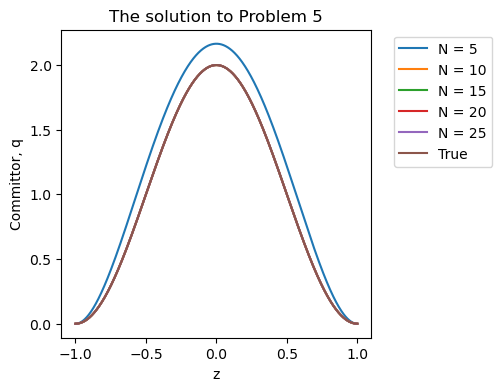

In [4]:
fig, ax = plt.subplots(figsize = fig_size)

for j in range(N_list):
    z = np.linspace(zmin1,zmax1,Nx)
    q = sol_list[j]
    plt.plot(z,q,label = f"N = {nlist[j]}")
plt.plot(z,np.cos(np.pi*z)+1,label= "True")
plt.xlabel("z")
plt.ylabel("Committor, q")
# ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("The solution to Problem 5")
plt.savefig("Chebyshev_Problem5Solution.pdf", bbox_inches='tight')

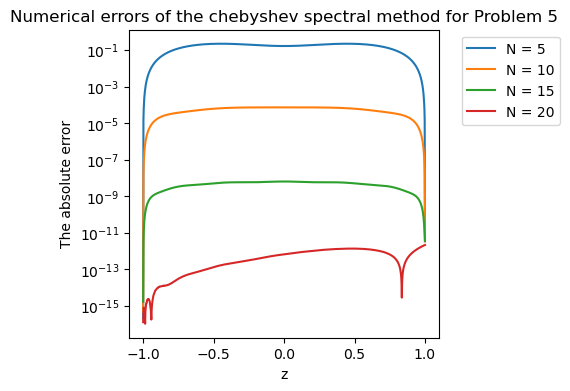

In [5]:
fig, ax = plt.subplots(figsize = fig_size)
q_ref = sol_list[-1]
for j in range(N_list-1):
    q = sol_list[j]
    plt.plot(z,abs(q-q_ref),label = f"N = {nlist[j]}")
plt.xlabel("z")
plt.ylabel("The absolute error")
ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Numerical errors of the chebyshev spectral method for Problem 5")
plt.savefig("Chebyshev_Problem5Errors.pdf", bbox_inches='tight')

In [6]:
##Problem 6
def solvePDE2(N,scale,shift,f,x_evaluate,qbdry):
    D, x = cheb(N)
    D2 = D @ D
    D4 = D2 @ D2
    A = (0.4**4)*D4 +0.4 * D + np.eye(N+1)
    RHS = f(x)
    
    # Enforce u(1)=0
    A[0, :] = 0
    A[0, 0] = 1
    RHS[0] = 0 

    #Enforce Du(1)=0
    A[1, :] = D[0, :]
    RHS[1] = 0

    #Enforce Du(-1)=0
    A[-2, :] = D[-1, :]
    RHS[-2] = 0

    #Enforce u(-1)=0
    A[-1, :] = 0
    A[-1, -1] = 1
    RHS[-1] = 0
    
    u = np.linalg.solve(A, RHS)
    q = qbdry(x) + u
    # evaluate q at x_evaluate
    cheb_coeff = np.zeros((N+1,))
    t = (np.arange(N+1))*np.pi/N 
    for k in range(n+1):
        cheb_coeff[k] = 2*np.sum(q*np.cos(k*t))/N - q[0]*np.cos(k*t[0])/N - q[N]*np.cos(k*t[-1])/N
    N_eval = np.size(x_evaluate)
    q_out = np.zeros_like(x_evaluate)
    for j in range(N_eval):
        q_out[j] = ChebSum2_Clenshaw_matrix(N,x_evaluate[j],cheb_coeff)
    return q_out

def g2(x):
    return (24-240*x**2+120*x**4)/(1+x**2)**5+1/(1+x**2)-(2*x)/(1+x**2)**2
def qbdry2(x):
    return ((x-1)**2)*(x+2)/4+((x+1)**2)*(2-x)/104-5*((x+1)**2)*(x-1)/(2*676)
def qbdry2_prime(x):
    return 2*((x-1))*(x+2)/4+((x-1)**2)/4+2*((x+1))*(2-x)/104-((x+1)**2)/104-10*((x+1))*(x-1)/(2*676)-5*((x+1)**2)/(2*676)
def g_tilde(x):
    return g2(2.5*x+2.5)-qbdry2(x)-0.4*qbdry2_prime(x)


zmin2 = 0
zmax2 = 5
scale2 = 0.5*(zmax2 - zmin2)
shift2 = 0.5*(zmax2 + zmin2)

Nx = 1000
x_eval = np.linspace(-1,1,Nx)
sol_list = []

nlist = [10,20,30,40,50,60,70,80,90]
N_list = len(nlist)
for n in nlist:
    q_out = solvePDE2(n,scale2,shift2,g_tilde,x_eval,qbdry2)
    sol_list.append(q_out)

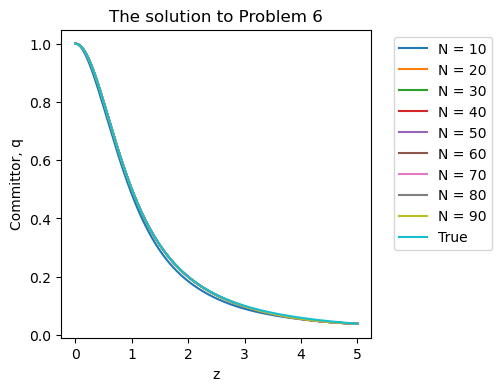

In [7]:
fig, ax = plt.subplots(figsize = fig_size)

for j in range(N_list):
    z = np.linspace(zmin2,zmax2,Nx)
    q = sol_list[j]
    plt.plot(z,q,label = f"N = {nlist[j]}")
plt.plot(z,(1+z**2)**(-1),label= "True")
plt.xlabel("z")
plt.ylabel("Committor, q")
# ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("The solution to Problem 6")
plt.savefig("Chebyshev_Problem6Solution.pdf", bbox_inches='tight')

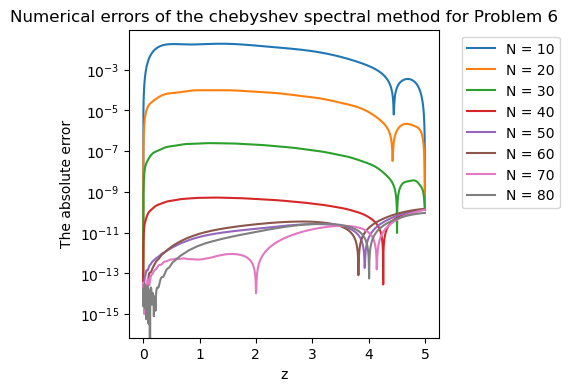

In [8]:
fig, ax = plt.subplots(figsize = fig_size)
q_ref = sol_list[-1]
for j in range(N_list-1):
    q = sol_list[j]
    plt.plot(z,abs(q-q_ref),label = f"N = {nlist[j]}")
plt.xlabel("z")
plt.ylabel("The absolute error")
ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Numerical errors of the chebyshev spectral method for Problem 6")
plt.savefig("Chebyshev_Problem6Errors.pdf", bbox_inches='tight')